In [100]:
import pandas as pd
import numpy as np
import pickle
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

In [121]:
spread = pd.read_pickle('../CapstoneProject/spread_df.pkl')

In [122]:
df_2014 = spread[spread.year =='2014']
df_2018 = spread[spread.year == '2018']
df_2014

,team,year,g,date,opp,result,score,ats,spread,ou,total,home,score_diff,spread_diff
1,ATL,2014,1,"Oct 30, 2013",DAL,0,"[118.0, 109.0]",0.0,6.0,O,196,0,-9.0,-3.0
2,ATL,2014,2,"Nov 1, 2013",TOR,1,"[102.0, 95.0]",1.0,-3.5,O,196,1,7.0,3.5
3,ATL,2014,3,"Nov 3, 2013",LAL,0,"[105.0, 103.0]",0.0,-1.0,O,205,0,-2.0,-3.0
4,ATL,2014,4,"Nov 5, 2013",SAC,1,"[105.0, 100.0]",1.0,2.0,O,200,0,5.0,7.0
5,ATL,2014,5,"Nov 7, 2013",DEN,0,"[109.0, 107.0]",1.0,4.5,O,204,0,-2.0,2.5
6,ATL,2014,6,"Nov 9, 2013",ORL,1,"[104.0, 94.0]",1.0,-6.5,U,199,1,10.0,3.5
7,ATL,2014,7,"Nov 11, 2013",CHO,1,"[103.0, 94.0]",1.0,-2.0,O,196,0,9.0,7.0
8,ATL,2014,8,"Nov 13, 2013",NYK,0,"[95.0, 91.0]",0.0,-4.5,U,201.5,1,-4.0,-8.5
9,ATL,2014,9,"Nov 15, 2013",PHI,1,"[113.0, 103.0]",1.0,-8.5,O,208,1,10.0,1.5
10,ATL,2014,10,"Nov 16, 2013",NYK,1,"[110.0, 90.0]",1.0,4.0,U,202.5,0,20.0,24.0


In [123]:
df_2014_train = copy.deepcopy(df_2014[['team','opp','ats','spread']])
df_2018_train = copy.deepcopy(df_2018[['team','opp','ats','spread']])

In [124]:
columns = df_2014_train.columns.values
columns[0] = 'home'
df_2014_train.columns = columns
df_2014_train

,home,opp,ats,spread
1,ATL,DAL,0.0,6.0
2,ATL,TOR,1.0,-3.5
3,ATL,LAL,0.0,-1.0
4,ATL,SAC,1.0,2.0
5,ATL,DEN,1.0,4.5
6,ATL,ORL,1.0,-6.5
7,ATL,CHO,1.0,-2.0
8,ATL,NYK,0.0,-4.5
9,ATL,PHI,1.0,-8.5
10,ATL,NYK,1.0,4.0


In [125]:
columns = df_2018_train.columns.values
columns[0] = 'home'
df_2018_train.columns = columns
df_2018_train

,home,opp,ats,spread
329,ATL,DAL,1.0,5.5
330,ATL,CHO,0.0,4.5
331,ATL,BRK,0.0,1.5
332,ATL,MIA,1.0,11.0
333,ATL,CHI,0.0,2.0
334,ATL,DEN,1.0,7.5
335,ATL,MIL,0.0,5.5
336,ATL,PHI,0.0,8.0
337,ATL,HOU,0.0,9.0
338,ATL,CLE,1.0,11.5


In [126]:
df_test = pd.get_dummies(df_2014_train[['home','opp']])

In [127]:
df_test = pd.concat([df_test,df_2014_train[['spread','ats']]],axis=1)

In [128]:
df_test.index = range(len(df_test))

In [129]:
df_test
X = copy.deepcopy(df_test.drop(columns=['ats']))
y = df_test.ats.values

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [131]:
rf = RandomForestClassifier(n_estimators=1000)

In [132]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.44390243902439025

In [133]:
rf.score(X_train,y_train)

0.983739837398374

In [134]:
spread_train = spread[spread.year != '2018']
spread_test = spread[spread.year =='2018']

In [135]:
spread_train = copy.deepcopy(spread_train[['team','opp','home','spread','ats']])
spread_test = copy.deepcopy(spread_test[['team','opp','home','spread','ats']])

In [136]:
spread_train.index = range(len(spread_train))
spread_test.index = range(len(spread_test))

In [137]:
spread_train

,team,opp,home,spread,ats
0,ATL,DAL,0,6.0,0.0
1,ATL,TOR,1,-3.5,1.0
2,ATL,LAL,0,-1.0,0.0
3,ATL,SAC,0,2.0,1.0
4,ATL,DEN,0,4.5,1.0
5,ATL,ORL,1,-6.5,1.0
6,ATL,CHO,0,-2.0,1.0
7,ATL,NYK,1,-4.5,0.0
8,ATL,PHI,1,-8.5,1.0
9,ATL,NYK,0,4.0,1.0


In [138]:
spread_copy = copy.deepcopy(spread_train)
for i in range(len(spread_copy)):
    team = spread_train.team.loc[i]
    opp = spread_train.opp.loc[i]
    if spread_train.home[i] == 0:
        spread_copy.loc[i,'team'] = opp
        spread_copy.loc[i,'opp'] = team

In [139]:
spread_copy_test = copy.deepcopy(spread_test)
for i in range(len(spread_copy_test)):
    team = spread_test.team.loc[i]
    opp = spread_test.opp.loc[i]
    if spread_test.home[i] == 0:
        spread_copy_test.loc[i,'team'] = opp
        spread_copy_test.loc[i,'opp'] = team

In [140]:
columns = spread_copy.columns.values
columns[0] = 'home'
spread_copy.columns = columns
train = copy.deepcopy(pd.get_dummies(spread_copy))
columns = spread_copy_test.columns.values
columns[0] = 'home'
test = copy.deepcopy(pd.get_dummies(spread_copy_test))

In [155]:
y_train = train.ats.values
X_train = copy.deepcopy(train.drop(columns=['ats','home']))
y_test = test.ats.values
X_test = copy.deepcopy(test.drop(columns=['ats','home']))

In [156]:
X_T, X_t, y_T, y_t = train_test_split(X_train,y_train)

In [159]:
rf = RandomForestClassifier(n_estimators=1000)

In [162]:
X_T

,spread,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,home_DET,...,opp_OKC,opp_ORL,opp_PHI,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_TOR,opp_UTA,opp_WAS
1713,8.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4872,-1.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5172,2.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9418,-1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5745,5.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4973,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8819,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9404,-7.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2537,-9.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1775,-12.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
rf.fit(X_T,y_T)
rf.score(X_t,y_t)

0.4711382113821138

In [143]:
y_test = test.ats.values

In [144]:
rf.score(X_test,y_test)

0.5178861788617887

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5215447154471544

In [28]:
lr.coef_

array([[-0.00292121,  0.00599896, -0.02131752, -0.00916619,  0.00299503,
        -0.03382241, -0.00763543, -0.00987946,  0.02395954,  0.02599758,
         0.00204962,  0.02548853, -0.01183578, -0.00967051, -0.02429171,
         0.01210177,  0.01296773,  0.01361027,  0.01521893, -0.01222718,
         0.01392111, -0.02211145,  0.02435118,  0.00268519, -0.00973753,
        -0.01060059, -0.02554225,  0.01370456, -0.01204904,  0.00278581,
         0.04916004,  0.01419087,  0.00229487,  0.00289089,  0.00362134,
        -0.01021566,  0.03914663, -0.00911662, -0.01138939,  0.02504662,
        -0.02046076,  0.0253135 , -0.00075745, -0.00925777, -0.00157564,
         0.00026494,  0.01249768, -0.02034074,  0.00407007, -0.01303401,
         0.03675109, -0.00971566, -0.01143567,  0.00339267, -0.00917265,
         0.02326248, -0.03764472,  0.03688785, -0.01304929,  0.00361106,
         0.00167926, -0.00826423]])

In [29]:
!ls ../NBA_NOTEBOOKS/

EDA.ipynb
Scrape CHA(CHO) stats from 2008-2014(only really need 2014) .ipynb
add CHO CHA data to finaldf.ipynb
added_cho_data_final_df.pkl
boxscore_df_with_njn_noh.pkl
boxscores_2014_2018.pkl
gbc_2014.pkl
gbc_2015.pkl
gbc_2016.pkl
gbc_2017.pkl
jonathan lin proposal nba sports bet.txt
logistic_model.pkl
lr_2014.pkl
lr_2015.pkl
lr_2016.pkl
lr_2017.pkl
lr_model.pkl
nba margin predictor.txt
new angle.ipynb
pkl_files
populate game simulation training set.ipynb
rf_2014.pkl
rf_2015.pkl
rf_2016.pkl
rf_2017.pkl
spread df work.ipynb
team_avg.pkl
webscrap pipeline.ipynb
yelpproject.txt


In [32]:
box_2014 = pd.read_pickle('../NBA_NOTEBOOKS/boxscores_2014_2018.pkl')
team_avg = pd.read_pickle('../NBA_NOTEBOOKS/team_avg.pkl')
spread_df = pd.read_pickle('../CapstoneProject/spread_df.pkl')

In [33]:
teams    =    ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK',\
              'OKC','ORL', 'PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']


In [34]:
X_train

,home,spread,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,...,opp_OKC,opp_ORL,opp_PHI,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_TOR,opp_UTA,opp_WAS
0,0,6.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,-1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,-6.5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,-2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,-4.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,-8.5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
def box_score_grabber(boxscore,team,year,spread_df):
    df = copy.deepcopy(boxscore[(boxscore.team==team) & (boxscore.year==year)])
    df.index = range(len(df))
    df_new = copy.deepcopy(df[['fg_pct','fg3_pct','orb','drb','ast','stl','blk','tov','pf'\
              ,'opp_fg_pct','opp_fg3_pct','opp_orb','opp_drb','opp_ast'\
              ,'opp_stl','opp_blk','opp_tov','opp_pf']])
    spread = copy.deepcopy(spread_df[(spread_df.team==team)&(spread_df.year==year)])
    spread.index = range(len(spread))
    ats_record = np.insert((np.cumsum(spread.ats.values[:81]))/range(1,82),0,0.0)
    spread['ats_record'] = ats_record
    spread_dup = copy.deepcopy(spread)
    for i in range(len(spread)):
        team = team
        opp = spread.opp.loc[i]
        if spread.home[i] == 0:
            spread_dup.loc[i,'team'] = opp
            spread_dup.loc[i,'opp'] = team
    columns = spread_dup.columns.values
    columns[0] = 'home'
    spread_dup.columns = columns
    spread_dup_dum = pd.get_dummies(spread_dup[['home','opp']])
    final_box = pd.concat([spread_dup[['spread','ats_record']],spread_dup_dum.drop(columns='home',axis=1)],axis=1)
    y_df = spread.ats.values
    return pd.concat([final_box,df_new],axis=1), y_df

In [184]:
X,y = box_score_grabber(box_2014,'ATL','2017',spread_df)

In [185]:
X_t, y_t = spread_prediction_creator('ATL','2018',team_avg,spread_df,samples=100)

In [186]:
rf.fit(X,y)
rf.score(X_t,y_t)

0.5

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)

In [171]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [172]:
rf.score(X_test,y_test)

0.8888888888888888

In [84]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
lr.score(X_test,y_test)

0.7317073170731707

In [86]:
X_test

,spread,ats_record,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,...,pf,opp_fg_pct,opp_fg3_pct,opp_orb,opp_drb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
4,1.5,0.750000,0,0,0,0,0,0,0,0,...,24.0,0.388,0.250,11.0,35.0,13.0,7.0,3.0,19.0,23.0
56,-3.0,0.500000,1,0,0,0,0,0,0,0,...,12.0,0.404,0.459,15.0,39.0,30.0,7.0,5.0,12.0,27.0
50,-7.0,0.500000,1,0,0,0,0,0,0,0,...,20.0,0.346,0.259,7.0,26.0,17.0,8.0,4.0,13.0,19.0
1,-8.0,1.000000,0,0,0,0,0,0,0,0,...,14.0,0.350,0.278,4.0,35.0,16.0,9.0,5.0,20.0,20.0
22,-9.0,0.454545,1,0,0,0,0,0,0,0,...,20.0,0.425,0.407,8.0,25.0,20.0,6.0,6.0,16.0,16.0
7,-3.5,0.714286,1,0,0,0,0,0,0,0,...,20.0,0.451,0.333,8.0,23.0,24.0,14.0,3.0,13.0,21.0
70,8.0,0.442857,0,0,0,0,0,0,0,0,...,19.0,0.400,0.324,17.0,37.0,23.0,9.0,6.0,19.0,26.0
63,-10.0,0.460317,1,0,0,0,0,0,0,0,...,22.0,0.463,0.333,5.0,35.0,28.0,7.0,11.0,22.0,25.0
43,-10.0,0.511628,1,0,0,0,0,0,0,0,...,18.0,0.423,0.414,7.0,32.0,27.0,8.0,6.0,22.0,19.0
18,-5.5,0.555556,0,0,0,0,0,0,0,0,...,22.0,0.449,0.476,13.0,28.0,15.0,11.0,4.0,15.0,17.0


In [102]:
def spread_prediction_creator(team,year,team_avg,spread_df,weight=.5,samples=1):
    spread = copy.deepcopy(spread_df[(spread_df.team==team)&(spread_df.year==year)])
    spread.index = range(len(spread))
    ats_record = np.insert((np.cumsum(spread.ats.values[:81]))/range(1,82),0,0.0)
    spread['ats_record'] = ats_record
    spread_dup = copy.deepcopy(spread)
    for i in range(len(spread)):
        team = team
        opp = spread.opp.loc[i]
        if spread.home[i] == 0:
            spread_dup.loc[i,'team'] = opp
            spread_dup.loc[i,'opp'] = team
    columns = spread_dup.columns.values
    columns[0] = 'home'
    spread_dup.columns = columns
    spread_dup_dum = pd.get_dummies(spread_dup[['home','opp']])
    final_box = pd.concat([spread_dup[['spread','ats_record']],spread_dup_dum.drop(columns='home')],axis=1)
    opp = spread.opp.values
    lst = []
    y_df = spread.ats.values
    for item in opp:
        lst.append(team_sampler(team,item,team_avg,year,weight=.5,samples=1))
    return pd.concat([final_box,pd.DataFrame(lst,columns=['fg_pct','fg3_pct','orb','drb','ast','stl','blk','tov','pf'\
              ,'opp_fg_pct','opp_fg3_pct','opp_orb','opp_drb','opp_ast'\
              ,'opp_stl','opp_blk','opp_tov','opp_pf'])],axis=1), y_df

In [103]:
def team_sampler(team1:str,team2:str,avgs:dict,year:str,weight=.5,samples=1):
    '''
    takes two team inputs and a dictionary with teams as keys and values as averages and standard deviations
    it attempts to generate a sample game using the previous year's data
    the sample weight is with respect to team1
    '''
    year = str(int(year)-1)

    team1_fg_pct = stats.norm(weight * pd.DataFrame(avgs[team1][year]).fg_pct.values[0] + (1-weight) * pd.DataFrame(avgs[team2][year]).opp_fg_pct.values[0]\
                          , (((weight**2) * pd.DataFrame(avgs[team1][year]).fg_pct.values[1]) + ((1-weight)**2) \
                          * pd.DataFrame(avgs[team2][year]).opp_fg_pct.values[1])).rvs(samples).mean()
    
    team2_fg_pct   = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_fg_pct.values[0] + (1-weight) * pd.DataFrame(avgs[team2][year]).fg_pct.values[0]\
                          , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_fg_pct.values[1]) + ((1-weight)**2) \
                          * pd.DataFrame(avgs[team2][year]).fg_pct.values[1])).rvs(samples).mean()
    
    team1_fg3_pct  = stats.norm(weight * pd.DataFrame(avgs[team1][year]).fg3_pct.values[0] + (1-weight) * pd.DataFrame(avgs[team2][year]).opp_fg3_pct.values[0]\
                          , (((weight**2) * pd.DataFrame(avgs[team1][year]).fg3_pct.values[1]) + ((1-weight)**2) \
                          * pd.DataFrame(avgs[team2][year]).opp_fg3_pct.values[1])).rvs(samples).mean()
    
    team2_fg3_pct  = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_fg3_pct.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).fg3_pct.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_fg3_pct.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).fg3_pct.values[1])).rvs(samples).mean()
    
    team1_orb   = stats.norm(weight * pd.DataFrame(avgs[team1][year]).orb.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_orb.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).orb.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_orb.values[1])).rvs(samples).mean()
    
    team2_orb   = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_orb.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).orb.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_orb.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).orb.values[1])).rvs(samples).mean()
    
    team1_drb   = stats.norm(weight * pd.DataFrame(avgs[team1][year]).drb.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_drb.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).drb.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_drb.values[1])).rvs(samples).mean()
    
    team2_drb   = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_drb.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).drb.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_drb.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).drb.values[1])).rvs(samples).mean()
        
    team1_ast    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).ast.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_ast.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).ast.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_ast.values[1])).rvs(samples).mean()
    
    team2_ast    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_ast.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).ast.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_ast.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).ast.values[1])).rvs(samples).mean()
    
    team1_stl    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).stl.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_stl.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).stl.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_stl.values[1])).rvs(samples).mean()
    
    team2_stl    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_stl.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).stl.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_stl.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).stl.values[1])).rvs(samples).mean()
    
    team1_blk    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).blk.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_blk.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).blk.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_blk.values[1])).rvs(samples).mean()
    
    team2_blk    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_blk.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).blk.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_blk.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).blk.values[1])).rvs(samples).mean()
    
    team1_tov    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).tov.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_tov.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).tov.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_tov.values[1])).rvs(samples).mean()
    
    team2_tov    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_tov.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).tov.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_tov.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).tov.values[1])).rvs(samples).mean()

    team1_pf     = stats.norm(weight * pd.DataFrame(avgs[team1][year]).pf.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_pf.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).pf.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_pf.values[1])).rvs(samples).mean()
    
    team2_pf     = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_pf.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).pf.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_pf.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).pf.values[1])).rvs(samples).mean()
   
    #team points should be an aggregation of other generated stats
    '''
    team1_pts    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).pts.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).opp_pts.values[0] \
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).pts.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).opp_pts.values[1])).rvs(samples).mean()
    
    team2_pts    = stats.norm(weight * pd.DataFrame(avgs[team1][year]).opp_pts.values[0] + (1-weight) \
                            * pd.DataFrame(avgs[team2][year]).pts.values[0]\
                            , (((weight**2) * pd.DataFrame(avgs[team1][year]).opp_pts.values[1]) + ((1-weight)**2) \
                            * pd.DataFrame(avgs[team2][year]).pts.values[1])).rvs(samples).mean()
    '''
    return [team1_fg_pct, team1_fg3_pct, team1_orb,team1_drb,team1_ast,team1_stl \
          , team1_blk,team1_tov, team1_pf, \
            team2_fg_pct, team2_fg3_pct, team2_orb,team2_drb,team2_ast,team2_stl\
           ,team2_blk,team2_tov,team2_pf]

In [107]:
X_train,y_train = box_score_grabber(box_2014,'HOU','2017',spread_df)
X_test, y_test = spread_prediction_creator('HOU','2018',team_avg,spread_df)

In [108]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.5487804878048781

In [110]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5

In [111]:
def create_season_test_set(teams,year,team_avg,spread_df,weight=.5,samples=1):
    x_df = pd.DataFrame()
    y_df = pd.DataFrame()
    for team in teams:
        x,y = spread_prediction_creator(team,year,team_avg,spread_df,weight,samples)
        x_df = pd.concat([x_df,x],axis=0)
        y_df = pd.concat([y_df,pd.DataFrame(y)],axis=0)
    X_test = x_df
    y_test = y_df.values.reshape(-1)
    X_test.index = (range(len(X_test)))
    return X_test, y_test

In [244]:
def create_season_training_set(teams,year,spread_df):
    x_df = pd.DataFrame()
    y_df = pd.DataFrame()
    for team in teams:
        x,y = box_score_grabber(box_2014,team,year,spread_df)
        x_df = pd.concat([x_df,x],axis=0)
        y_df = pd.concat([y_df,pd.DataFrame(y)],axis=0)
    X_train = x_df
    y_train = y_df.values.reshape(-1)
    X_train.index = (range(len(X_train)))
    return X_train, y_train

In [213]:
X

,spread,ats_record,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,...,pf,opp_fg_pct,opp_fg3_pct,opp_orb,opp_drb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,-7.0,0.000000,1,0,0,0,0,0,0,0,...,25.0,0.385,0.414,23.0,36.0,23.0,5.0,3.0,15.0,15.0
1,-4.5,0.000000,0,0,0,0,0,0,0,0,...,18.0,0.409,0.207,16.0,32.0,21.0,10.0,4.0,21.0,24.0
2,-4.0,0.500000,1,0,0,0,0,0,0,0,...,17.0,0.409,0.400,13.0,41.0,23.0,7.0,6.0,18.0,20.0
3,-2.0,0.333333,0,0,0,0,1,0,0,0,...,16.0,0.372,0.378,9.0,36.0,27.0,7.0,13.0,11.0,14.0
4,3.5,0.500000,0,0,0,0,0,0,0,0,...,14.0,0.442,0.179,13.0,36.0,13.0,10.0,9.0,18.0,21.0
5,-7.0,0.600000,1,0,0,0,0,0,0,0,...,17.0,0.434,0.238,14.0,29.0,24.0,9.0,4.0,19.0,19.0
6,-2.5,0.666667,0,0,0,0,0,0,0,0,...,21.0,0.500,0.333,6.0,26.0,30.0,9.0,7.0,12.0,24.0
7,-5.0,0.714286,1,0,0,0,0,0,0,0,...,15.0,0.487,0.333,8.0,33.0,27.0,11.0,3.0,24.0,18.0
8,-8.5,0.750000,1,0,0,0,0,0,0,0,...,19.0,0.575,0.467,8.0,32.0,27.0,10.0,5.0,19.0,18.0
9,-13.0,0.666667,1,0,0,0,0,0,0,0,...,16.0,0.446,0.483,8.0,32.0,21.0,6.0,0.0,19.0,21.0


In [255]:
X,y = create_season_training_set(teams,'2017',spread_df)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.99)

In [281]:
lr.coef_.argsort()[::-1]

array([[69, 73, 74, 22, 60, 68, 45,  7, 26, 51, 17, 33, 58, 20, 72, 50,
        13, 78, 71, 62, 77, 70, 56, 16, 40, 41,  9, 14, 19, 43, 55, 46,
        49, 53, 54, 61, 44, 38, 35, 18, 34, 32,  4,  6,  8, 11, 28, 12,
        15, 27, 25, 24, 37, 23, 21, 79, 47, 66, 31, 63, 52,  1, 29, 57,
        48,  3, 59,  2, 76, 36, 10, 30, 39, 75, 67, 42,  5, 65,  0, 64]])

In [253]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6055008210180624

In [254]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.5697865353037767

In [163]:
X_train, y_train = box_score_grabber_with_bins(box_2014,'HOU','2016',spread_df)

In [164]:
X_train

,home,spread,ats_record,home_HOU,opp_ATL,opp_BOS,opp_BRK,opp_CHI,opp_CHO,opp_CLE,...,pf,opp_fg_pct,opp_fg3_pct,opp_orb,opp_drb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,1,-10.5,0.000000,1,0,0,0,0,0,0,...,19.0,0.506,0.481,9.0,40.0,26.0,9.0,10.0,21.0,26.0
1,1,1.0,0.000000,1,0,0,0,0,0,0,...,20.0,0.462,0.346,11.0,36.0,26.0,9.0,4.0,8.0,24.0
2,0,4.0,0.000000,1,0,0,0,0,0,0,...,23.0,0.488,0.409,11.0,37.0,24.0,11.0,5.0,12.0,16.0
3,1,4.5,0.000000,1,0,0,0,0,0,0,...,22.0,0.476,0.435,14.0,41.0,17.0,7.0,9.0,24.0,24.0
4,1,-9.0,0.250000,1,0,0,0,0,0,0,...,20.0,0.505,0.350,9.0,29.0,28.0,12.0,6.0,14.0,25.0
5,0,-4.5,0.200000,1,0,0,0,0,0,0,...,26.0,0.430,0.321,14.0,29.0,26.0,14.0,3.0,15.0,19.0
6,0,5.5,0.333333,1,0,0,0,0,0,0,...,27.0,0.477,0.182,11.0,30.0,29.0,8.0,5.0,12.0,23.0
7,1,-11.0,0.428571,1,0,0,1,0,0,0,...,14.0,0.429,0.471,20.0,40.0,25.0,5.0,11.0,11.0,13.0
8,0,-6.5,0.375000,1,0,0,0,0,0,0,...,25.0,0.457,0.450,12.0,34.0,25.0,10.0,4.0,18.0,23.0
9,1,-7.5,0.333333,1,0,0,0,0,0,0,...,23.0,0.483,0.286,8.0,37.0,24.0,6.0,7.0,11.0,21.0


In [214]:
X_test

,spread,ats_record,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,...,pf,opp_fg_pct,opp_fg3_pct,opp_orb,opp_drb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
1184,8.5,0.472222,0,0,0,0,0,0,0,0,...,24.0,0.458,0.471,13.0,39.0,20.0,3.0,6.0,15.0,23.0
831,-7.0,0.272727,0,0,0,0,0,0,0,0,...,20.0,0.398,0.300,10.0,38.0,18.0,11.0,7.0,19.0,27.0
1290,-14.0,0.550000,0,0,0,0,0,0,0,0,...,25.0,0.402,0.227,6.0,32.0,12.0,7.0,2.0,9.0,24.0
245,5.5,0.481481,0,0,1,0,0,0,0,0,...,17.0,0.441,0.351,16.0,41.0,24.0,5.0,10.0,9.0,12.0
18,7.0,0.500000,0,0,0,0,0,0,0,0,...,17.0,0.471,0.529,12.0,37.0,25.0,11.0,9.0,16.0,14.0
2197,-9.0,0.600000,0,0,0,0,0,0,0,0,...,17.0,0.383,0.111,18.0,38.0,18.0,7.0,2.0,19.0,23.0
1655,-12.0,0.400000,0,0,0,0,0,0,0,0,...,11.0,0.457,0.231,11.0,34.0,20.0,10.0,3.0,17.0,19.0
2407,7.5,0.517241,0,0,0,0,0,0,0,0,...,27.0,0.341,0.250,15.0,40.0,14.0,5.0,6.0,16.0,16.0
2216,-6.0,1.000000,0,0,0,0,0,0,0,0,...,19.0,0.420,0.263,7.0,26.0,21.0,6.0,8.0,18.0,21.0
158,-9.0,0.539474,0,0,0,0,0,0,0,0,...,25.0,0.411,0.286,11.0,36.0,22.0,6.0,4.0,11.0,17.0


In [282]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [283]:
gpc = GaussianProcessClassifier()

In [393]:
X_train, y_train = create_season_training_set(teams,'2017',spread_df)
X_test, y_test = create_season_test_set(teams,'2018',team_avg,spread_df,samples=100)

In [289]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5121951219512195

In [291]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.501219512195122

In [292]:
gpc.fit(X_train,y_train)
gpc.score(X_test,y_test)

0.4959349593495935

In [358]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import LSTM


In [345]:
from keras.layers import Dense

In [398]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=80))
model.add(Dropout(.05))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.05))
model.add(Dense(16,activation='relu'))
model.add(Dropout(.05))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [399]:
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
2460/2460 [==============================] - 1s 556us/step - loss: 0.6935 - acc: 0.6252
Epoch 2/150
2460/2460 [==============================] - 0s 93us/step - loss: 0.5391 - acc: 0.7187
Epoch 3/150
2460/2460 [==============================] - 0s 95us/step - loss: 0.4795 - acc: 0.7679
Epoch 4/150
2460/2460 [==============================] - 0s 99us/step - loss: 0.4509 - acc: 0.7817
Epoch 5/150
2460/2460 [==============================] - 0s 102us/step - loss: 0.4268 - acc: 0.7992
Epoch 6/150
2460/2460 [==============================] - 0s 96us/step - loss: 0.4181 - acc: 0.8093
Epoch 7/150
2460/2460 [==============================] - 0s 97us/step - loss: 0.4262 - acc: 0.7963
Epoch 8/150
2460/2460 [==============================] - 0s 99us/step - loss: 0.3997 - acc: 0.8224
Epoch 9/150
2460/2460 [==============================] - 0s 104us/step - loss: 0.4075 - acc: 0.8114
Epoch 10/150
2460/2460 [==============================] - 0s 117us/step - loss: 0.3972 - acc: 0.8093
Epoch

2460/2460 [==============================] - 0s 102us/step - loss: 0.1636 - acc: 0.9350
Epoch 83/150
2460/2460 [==============================] - 0s 125us/step - loss: 0.1807 - acc: 0.9236
Epoch 84/150
2460/2460 [==============================] - 0s 98us/step - loss: 0.1588 - acc: 0.9317
Epoch 85/150
2460/2460 [==============================] - 0s 97us/step - loss: 0.1722 - acc: 0.9224
Epoch 86/150
2460/2460 [==============================] - 0s 98us/step - loss: 0.1713 - acc: 0.9276
Epoch 87/150
2460/2460 [==============================] - 0s 103us/step - loss: 0.1727 - acc: 0.9280
Epoch 88/150
2460/2460 [==============================] - 0s 128us/step - loss: 0.1520 - acc: 0.9354
Epoch 89/150
2460/2460 [==============================] - 0s 111us/step - loss: 0.1613 - acc: 0.9374
Epoch 90/150
2460/2460 [==============================] - 0s 114us/step - loss: 0.1549 - acc: 0.9407
Epoch 91/150
2460/2460 [==============================] - 0s 114us/step - loss: 0.1471 - acc: 0.9402
Epoch 

In [409]:
model.evaluate(X_test,y_test)

82/82 [==============================] - 0s 64us/step


[3.1604488884530415, 0.4756097575513328]

In [419]:
X_test, y_test = spread_prediction_creator('HOU','2018',team_avg,spread_df,samples=100000)

In [420]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5

In [421]:
X_train

,spread,ats_record,home_ATL,home_BOS,home_BRK,home_CHI,home_CHO,home_CLE,home_DAL,home_DEN,...,pf,opp_fg_pct,opp_fg3_pct,opp_orb,opp_drb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,-4.0,0.000000,1,0,0,0,0,0,0,0,...,19.0,0.426,0.300,12.0,28.0,25.0,14.0,4.0,19.0,20.0
1,-8.0,1.000000,0,0,0,0,0,0,0,0,...,14.0,0.350,0.278,4.0,35.0,16.0,9.0,5.0,20.0,20.0
2,-7.0,1.000000,1,0,0,0,0,0,0,0,...,20.0,0.480,0.435,6.0,32.0,26.0,10.0,6.0,19.0,34.0
3,-11.5,1.000000,1,0,0,0,0,0,0,0,...,19.0,0.533,0.409,11.0,31.0,24.0,11.0,9.0,15.0,25.0
4,1.5,0.750000,0,0,0,0,0,0,0,0,...,24.0,0.388,0.250,11.0,35.0,13.0,7.0,3.0,19.0,23.0
5,-3.0,0.600000,1,0,0,0,0,0,0,0,...,13.0,0.435,0.333,12.0,31.0,22.0,9.0,7.0,26.0,26.0
6,7.5,0.666667,0,0,0,0,0,1,0,0,...,21.0,0.374,0.262,13.0,26.0,21.0,12.0,1.0,6.0,20.0
7,-3.5,0.714286,1,0,0,0,0,0,0,0,...,20.0,0.451,0.333,8.0,23.0,24.0,14.0,3.0,13.0,21.0
8,-14.5,0.750000,1,0,0,0,0,0,0,0,...,14.0,0.434,0.379,10.0,29.0,21.0,14.0,4.0,19.0,20.0
9,-6.5,0.777778,0,0,0,0,0,0,0,0,...,13.0,0.404,0.304,17.0,31.0,13.0,11.0,7.0,23.0,23.0


In [503]:
import pymc3 as pm

In [423]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

In [425]:
mc = pm.Model()

In [426]:
import GPy

In [440]:
m = GPy.models.GPClassification(X_train,y_train.reshape(-1,1))


In [441]:
m

gp_classification.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,


In [442]:
print(m), '\n'
for i in range(5):
    m.optimize('bfgs', max_iters=100) #first runs EP and then optimizes the kernel parameters
    print( 'iteration:', i),
    print(m)
    print("")


Name : gp_classification
Objective : 1705.1420655242273
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp_classification.  |  value  |  constraints  |  priors
  rbf.variance        |    1.0  |      +ve      |        
  rbf.lengthscale     |    1.0  |      +ve      |        
KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

In [443]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

In [444]:
data = np.random.randn(20)

 /Users/JonathanLin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


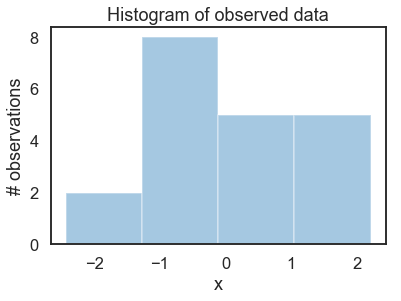

In [445]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations')

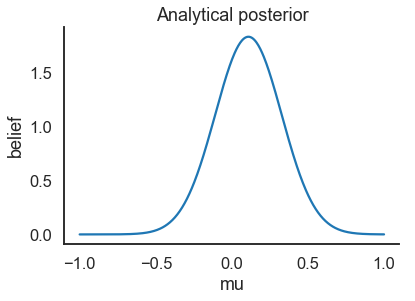

In [446]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

In [449]:
mu_current = 1
proposal_width = 1

In [450]:
proposal = norm(mu_current, proposal_width).rvs()

In [451]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

NameError: name 'mu_proposal' is not defined

In [452]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

In [453]:
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

 /Users/JonathanLin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


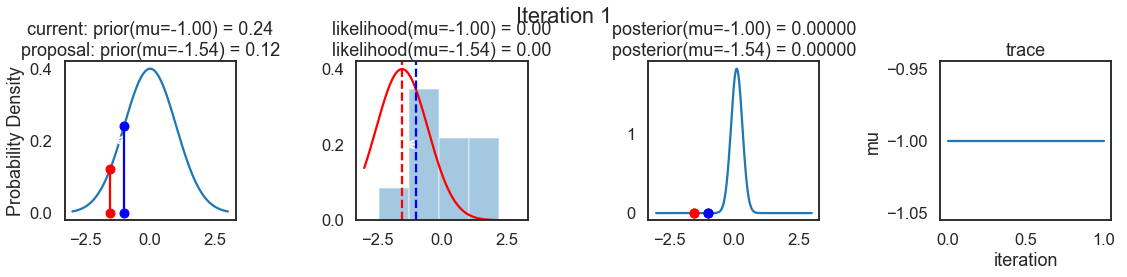

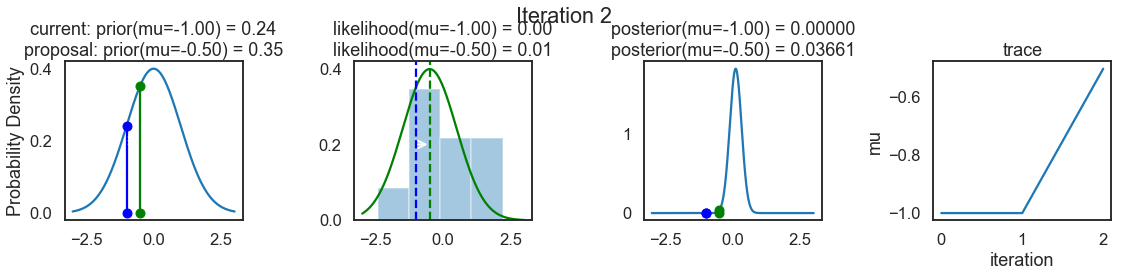

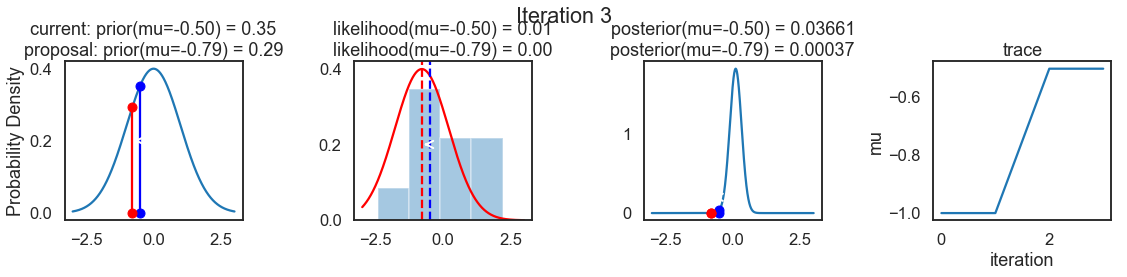

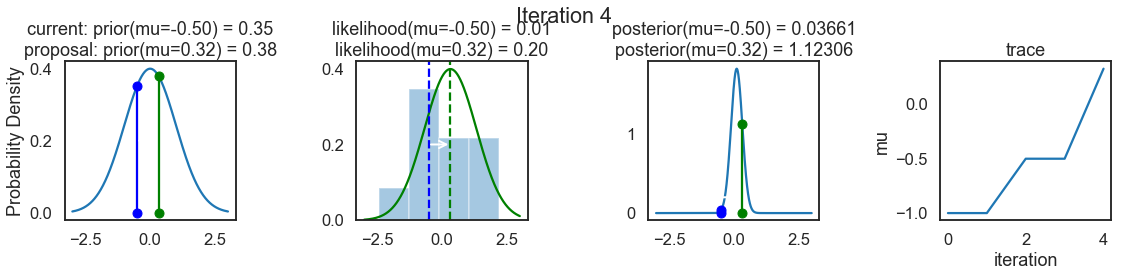

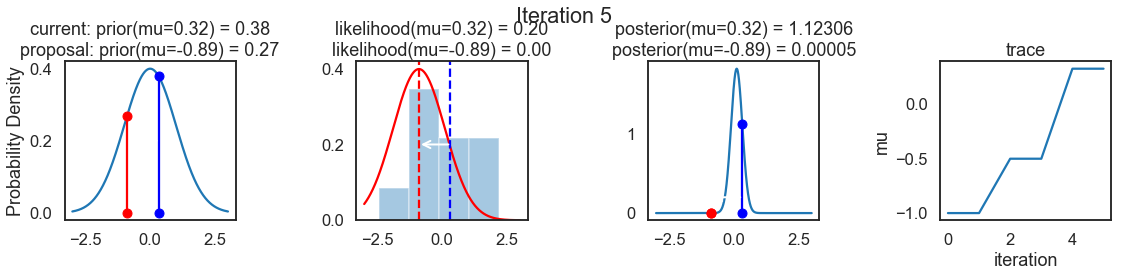

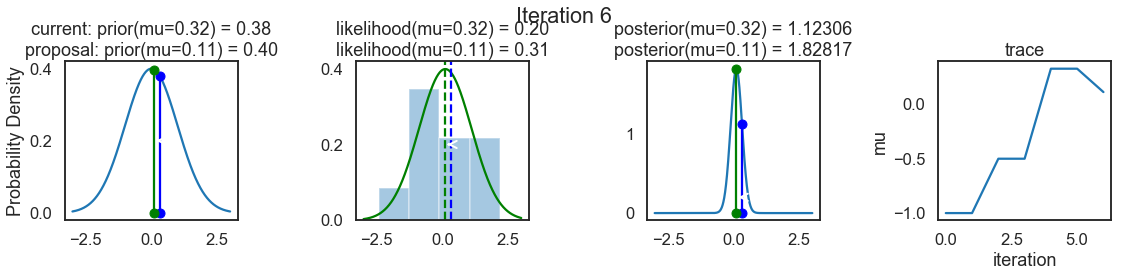

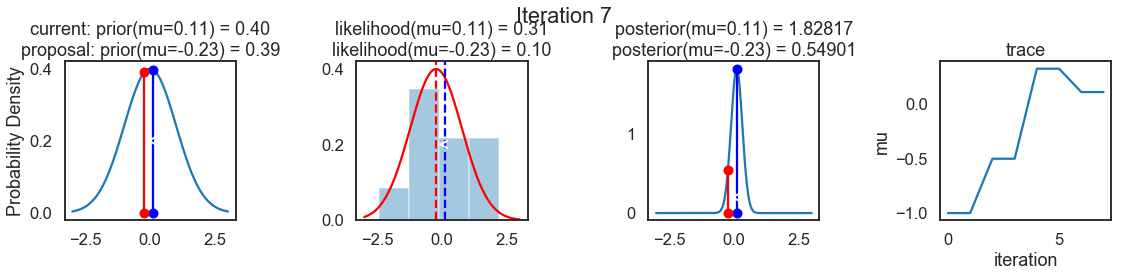

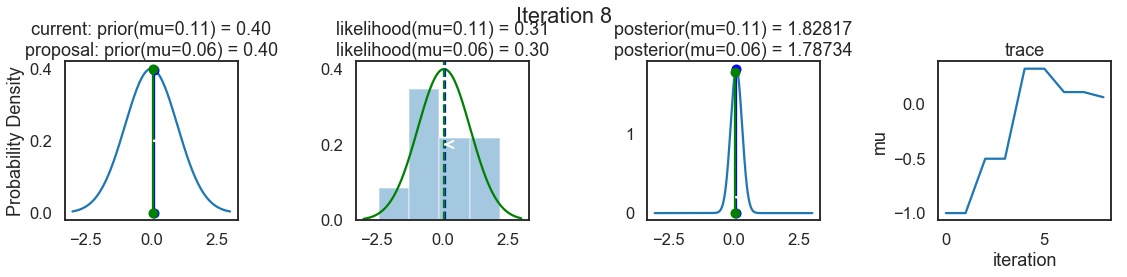

In [454]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

In [456]:
pymc.__version__

NameError: name 'pymc' is not defined

In [460]:
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [461]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

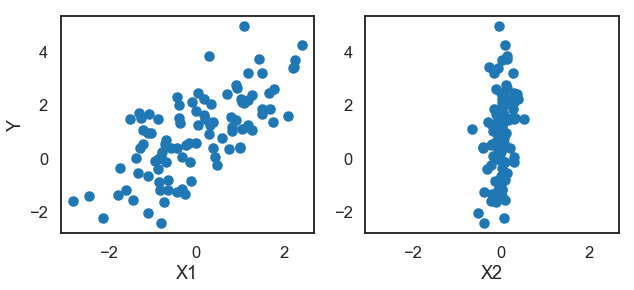

In [462]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [471]:
!ls ../NBA_NOTEBOOKS/

EDA.ipynb
Scrape CHA(CHO) stats from 2008-2014(only really need 2014) .ipynb
add CHO CHA data to finaldf.ipynb
added_cho_data_final_df.pkl
boxscore_df_with_njn_noh.pkl
boxscores_2014_2018.pkl
gbc_2014.pkl
gbc_2015.pkl
gbc_2016.pkl
gbc_2017.pkl
jonathan lin proposal nba sports bet.txt
logistic_model.pkl
lr_2014.pkl
lr_2015.pkl
lr_2016.pkl
lr_2017.pkl
lr_model.pkl
nba margin predictor.txt
new angle.ipynb
pkl_files
populate game simulation training set.ipynb
rf_2014.pkl
rf_2015.pkl
rf_2016.pkl
rf_2017.pkl
spread df work.ipynb
team_avg.pkl
webscrap pipeline.ipynb
yelpproject.txt


In [472]:
boxscores = pd.read_pickle('../NBA_NOTEBOOKS/boxscores_2014_2018.pkl')

In [474]:
boxscores.columns

Index(['team', 'year', 'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct',
       'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'opp_mp', 'opp_fg', 'opp_fga', 'opp_fg_pct', 'opp_fg3',
       'opp_fg3a', 'opp_fg3_pct', 'opp_ft', 'opp_fta', 'opp_ft_pct', 'opp_orb',
       'opp_drb', 'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk', 'opp_tov',
       'opp_pf', 'opp_pts'],
      dtype='object')

In [475]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10) #input last year's team avg
    beta = pm.Normal('beta', mu=0, sd=10, shape=18) #feature columns
    sigma = pm.HalfNormal('sigma', sd=10) #this would be the average points std for either offense or defense

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2 +beta[2]*X3 + beta[3]*X4 + beta[4]*X5 + beta[5]*X6 + beta[6]*X7 + beta[7]*X8 \
        beta[10]*X9 + beta[11]*X10 + beta[12]*X11 + beta[13]*X12 + beta[14]*X13 + beta[15]*X14 + beta[16]*X15 \
        + beta[17]*X16

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y) #Y is points scored or points allowed (off/def)

SyntaxError: invalid syntax (<ipython-input-475-35168ab5e831>, line 11)

In [494]:
df = boxscores[(boxscores.team=='ATL') & (boxscores.year=='2014')]
columns = df.columns.values
coeff = columns[2:21]
string = ''
for strings in coeff:
    string+= strings + ' + '
string

'mp + fg + fga + fg_pct + fg3 + fg3a + fg3_pct + ft + fta + ft_pct + orb + drb + trb + ast + stl + blk + tov + pf + pts + '

In [511]:
dfa = boxscores[(boxscores.team=='ATL') & (boxscores.year=='2014')]
df = copy.deepcopy(dfa[coeff])
df

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,240.0,37.0,76.0,0.487,8.0,24.0,0.333,27.0,35.0,0.771,5.0,28.0,33.0,27.0,16.0,5.0,17.0,20.0,109.0
1,240.0,36.0,77.0,0.468,10.0,23.0,0.435,20.0,31.0,0.645,7.0,30.0,37.0,24.0,7.0,3.0,13.0,12.0,102.0
2,240.0,40.0,90.0,0.444,9.0,22.0,0.409,14.0,26.0,0.538,10.0,42.0,52.0,26.0,9.0,3.0,11.0,22.0,103.0
3,240.0,39.0,81.0,0.481,8.0,22.0,0.364,19.0,26.0,0.731,9.0,27.0,36.0,26.0,11.0,7.0,14.0,15.0,105.0
4,240.0,43.0,94.0,0.457,8.0,26.0,0.308,13.0,19.0,0.684,13.0,33.0,46.0,31.0,11.0,9.0,11.0,23.0,107.0
5,240.0,43.0,90.0,0.478,6.0,19.0,0.316,12.0,17.0,0.706,7.0,32.0,39.0,36.0,9.0,6.0,12.0,15.0,104.0
6,240.0,35.0,76.0,0.461,10.0,27.0,0.370,23.0,28.0,0.821,6.0,35.0,41.0,26.0,7.0,3.0,13.0,22.0,103.0
7,240.0,35.0,77.0,0.455,5.0,24.0,0.208,16.0,21.0,0.762,8.0,39.0,47.0,22.0,1.0,6.0,15.0,15.0,91.0
8,240.0,39.0,81.0,0.481,10.0,23.0,0.435,25.0,31.0,0.806,6.0,37.0,43.0,25.0,6.0,5.0,15.0,23.0,113.0
9,240.0,44.0,78.0,0.564,9.0,22.0,0.409,13.0,17.0,0.765,5.0,31.0,36.0,20.0,9.0,4.0,13.0,15.0,110.0


In [510]:

with pm.Model() as model_glm:
    GLM.from_formula('pts ~ mp + fg + fga + fg_pct + fg3 + fg3a + fg3_pct + ft + fta + ft_pct + orb + drb + trb + ast + stl + blk + tov + pf',df)
    trace = pm.sample()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [507]:
from pymc3.glm import GLM
